In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori , association_rules

In [4]:
df = pd.read_csv("Order2.csv" , header = None)

In [5]:
df.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
transactions = df.apply(lambda row: [str(item) for item in row if str(item) != 'nan'], axis=1).tolist()

In [7]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

In [8]:
transaction_df = pd.DataFrame(te_ary , columns = te.columns_)

In [9]:
transaction_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [10]:
frequent_items = apriori(transaction_df , min_support = 0.02 , use_colnames = True)
rules = association_rules(frequent_items , metric='lift' , num_itemsets = None , min_threshold = 0.7)

In [11]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
1,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,1.0,0.013128,1.086988,0.555754,0.120941,0.080026,0.245256
2,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,1.0,0.007096,1.108844,0.353384,0.093168,0.098160,0.190499
3,(french fries),(burgers),0.170911,0.087188,0.021997,0.128705,1.476173,1.0,0.007096,1.047650,0.389069,0.093168,0.045482,0.190499
4,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,1.0,0.003614,1.057552,0.162275,0.081009,0.054420,0.191083


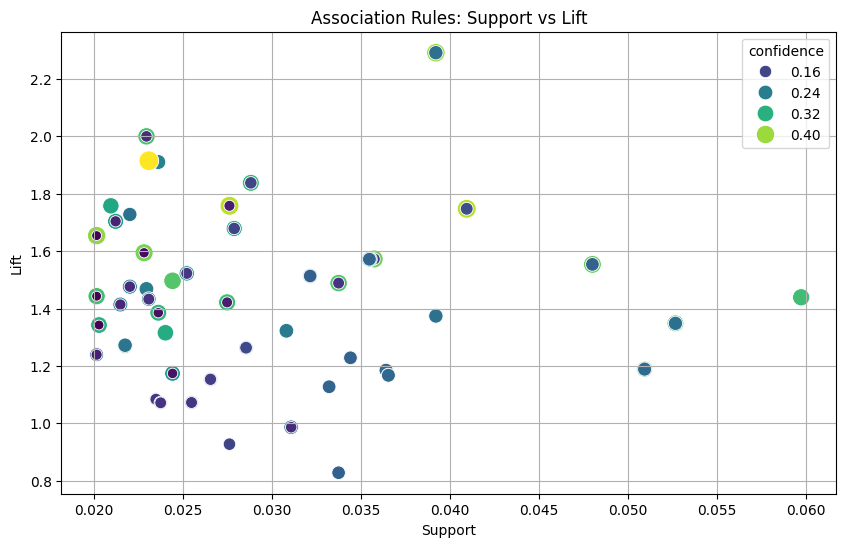

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='lift', size='confidence', hue='confidence', palette='viridis', sizes=(50, 200))
plt.title('Association Rules: Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.grid(True)
plt.show()

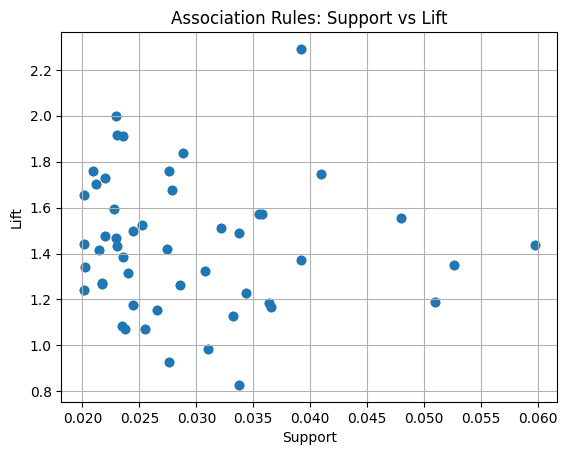

Top 10 Association Rules:
       antecedents      consequents   support  confidence      lift
0        (burgers)           (eggs)  0.028796    0.330275  1.837830
1           (eggs)        (burgers)  0.028796    0.160237  1.837830
2        (burgers)   (french fries)  0.021997    0.252294  1.476173
3   (french fries)        (burgers)  0.021997    0.128705  1.476173
4        (burgers)  (mineral water)  0.024397    0.279817  1.173883
..             ...              ...       ...         ...       ...
95     (spaghetti)       (pancakes)  0.025197    0.144717  1.522468
96        (shrimp)      (spaghetti)  0.021197    0.296642  1.703760
97     (spaghetti)         (shrimp)  0.021197    0.121746  1.703760
98     (spaghetti)       (tomatoes)  0.020931    0.120214  1.757755
99      (tomatoes)      (spaghetti)  0.020931    0.306043  1.757755

[100 rows x 5 columns]


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Data Preprocessing
# Load the dataset
data_path = "Order2.csv"  # Replace with the correct path to your dataset
transactions = pd.read_csv(data_path, header=None)

# Data cleaning: Remove NaN or any non-item entries from each transaction
# Convert the entire DataFrame to a list of transactions
transactions = transactions.apply(lambda row: [str(item) for item in row if str(item) != 'nan'], axis=1).tolist()

# Step 2: Prepare the data for the Apriori algorithm
# Convert transactions into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Apply Apriori Algorithm
# Set minimum support to find frequent itemsets (example: 0.02)
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)

# Step 4: Apply Association Rules (example: min_threshold=0.7)
# Remove num_itemsets=None if error comes here , it is due to version of mlxtend
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7, num_itemsets=None)

# Step 5: Visualize the results using a scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(rules['support'] , rules['lift']  )
plt.title('Association Rules: Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


# Print the top 10 association rules
print("Top 10 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])